# Exploratory Data Analysis on Global Movies (1950-2020)

### 1. Data Loading and Preprocessing

In [143]:
import pandas as pd
import sys
import os
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [ ]:
# Add the src directory to the Python path
sys.path.append('../src')

# Import the data scraper function
from data_scraper import scrape_imdb_movies_with_selenium

# Call the data scraper function
scrape_imdb_movies_with_selenium()

In [71]:
# Define the file path
file_path = "../data/imdb_top_movies.csv"
# Read the CSV file into a DataFrame
movies_df = pd.read_csv(file_path)  

In [72]:
# Display the first few rows of the DataFrame
print(movies_df.head())

                         Title  Year      Rating  \
0  1. The Shawshank Redemption  1994    9.3 (3M)   
1             2. The Godfather  1972  9.2 (2.1M)   
2           3. The Dark Knight  2008    9.0 (3M)   
3     4. The Godfather Part II  1974  9.0 (1.4M)   
4              5. 12 Angry Men  1957  9.0 (917K)   

                                               Genre  \
0            Epic, Period Drama, Prison Drama, Drama   
1              Epic, Gangster, Tragedy, Crime, Drama   
2  Action Epic, Epic, Superhero, Tragedy, Action,...   
3              Epic, Gangster, Tragedy, Crime, Drama   
4     Legal Drama, Psychological Drama, Crime, Drama   

                                         Director(s)  \
0  Jack Lawrence, Frank Darabont, Bob Gunton, Han...   
1  Marlon Brando, Kay Adams, Al Pacino, Francis F...   
2  Aaron Eckhart, Christopher Nolan, Jack Nichols...   
3  Al Pacino, Robert Duvall, Robert De Niro, Fran...   
4  Martin Balsam, E.G. Marshall, Juror #10, Lee J...   

             

In [73]:
# Check the shape of the dataset
movies_df.shape

(250, 7)

In [74]:
# View column names
movies_df.columns

Index(['Title', 'Year', 'Rating', 'Genre', 'Director(s)', 'Box Office Revenue',
       'Lead Actors'],
      dtype='object')

In [75]:
# Check for missing values
movies_df.isnull().sum()

Title                 0
Year                  0
Rating                0
Genre                 0
Director(s)           0
Box Office Revenue    0
Lead Actors           0
dtype: int64

In [76]:
# Summary statistics
movies_df.describe()

,Year
count,250.000000
mean,1988.432000
std,25.601153
min,1921.000000
25%,1972.250000
50%,1995.000000
75%,2009.000000
max,2024.000000


In [77]:
# Check for duplicates
movies_df.duplicated().sum()

np.int64(0)

In [78]:
# Rename the columns
movies_df.columns = ['title', 'year', 'rating', 'genre', "directors", "revenue", "lead_actors"]
print(movies_df.head())

                         title  year      rating  \
0  1. The Shawshank Redemption  1994    9.3 (3M)   
1             2. The Godfather  1972  9.2 (2.1M)   
2           3. The Dark Knight  2008    9.0 (3M)   
3     4. The Godfather Part II  1974  9.0 (1.4M)   
4              5. 12 Angry Men  1957  9.0 (917K)   

                                               genre  \
0            Epic, Period Drama, Prison Drama, Drama   
1              Epic, Gangster, Tragedy, Crime, Drama   
2  Action Epic, Epic, Superhero, Tragedy, Action,...   
3              Epic, Gangster, Tragedy, Crime, Drama   
4     Legal Drama, Psychological Drama, Crime, Drama   

                                           directors  \
0  Jack Lawrence, Frank Darabont, Bob Gunton, Han...   
1  Marlon Brando, Kay Adams, Al Pacino, Francis F...   
2  Aaron Eckhart, Christopher Nolan, Jack Nichols...   
3  Al Pacino, Robert Duvall, Robert De Niro, Fran...   
4  Martin Balsam, E.G. Marshall, Juror #10, Lee J...   

             

In [79]:
#Divide the rating column into two columns with rating and votes
movies_df[['rating', 'votes']] = movies_df['rating'].str.split("(", expand=True)
print(movies_df.head())

                         title  year rating  \
0  1. The Shawshank Redemption  1994   9.3    
1             2. The Godfather  1972   9.2    
2           3. The Dark Knight  2008   9.0    
3     4. The Godfather Part II  1974   9.0    
4              5. 12 Angry Men  1957   9.0    

                                               genre  \
0            Epic, Period Drama, Prison Drama, Drama   
1              Epic, Gangster, Tragedy, Crime, Drama   
2  Action Epic, Epic, Superhero, Tragedy, Action,...   
3              Epic, Gangster, Tragedy, Crime, Drama   
4     Legal Drama, Psychological Drama, Crime, Drama   

                                           directors  \
0  Jack Lawrence, Frank Darabont, Bob Gunton, Han...   
1  Marlon Brando, Kay Adams, Al Pacino, Francis F...   
2  Aaron Eckhart, Christopher Nolan, Jack Nichols...   
3  Al Pacino, Robert Duvall, Robert De Niro, Fran...   
4  Martin Balsam, E.G. Marshall, Juror #10, Lee J...   

                         revenue           

In [80]:
# Remove the parentheses from the votes column
movies_df['votes'] = movies_df['votes'].str.replace(")", "")
print(movies_df.head())

                         title  year rating  \
0  1. The Shawshank Redemption  1994   9.3    
1             2. The Godfather  1972   9.2    
2           3. The Dark Knight  2008   9.0    
3     4. The Godfather Part II  1974   9.0    
4              5. 12 Angry Men  1957   9.0    

                                               genre  \
0            Epic, Period Drama, Prison Drama, Drama   
1              Epic, Gangster, Tragedy, Crime, Drama   
2  Action Epic, Epic, Superhero, Tragedy, Action,...   
3              Epic, Gangster, Tragedy, Crime, Drama   
4     Legal Drama, Psychological Drama, Crime, Drama   

                                           directors  \
0  Jack Lawrence, Frank Darabont, Bob Gunton, Han...   
1  Marlon Brando, Kay Adams, Al Pacino, Francis F...   
2  Aaron Eckhart, Christopher Nolan, Jack Nichols...   
3  Al Pacino, Robert Duvall, Robert De Niro, Fran...   
4  Martin Balsam, E.G. Marshall, Juror #10, Lee J...   

                         revenue           

In [81]:
movies_df.dtypes

title          object
year            int64
rating         object
genre          object
directors      object
revenue        object
lead_actors    object
votes          object
dtype: object

In [82]:
# Convert the rating column to float
movies_df['rating'] = movies_df['rating'].astype(float)
movies_df.dtypes

title           object
year             int64
rating         float64
genre           object
directors       object
revenue         object
lead_actors     object
votes           object
dtype: object

In [54]:
# Replace the "Unknown" values in the revenue column with 0
movies_df['revenue'] = movies_df['revenue'].replace('Unknown', 0)

In [83]:
print(movies_df['revenue'].head())

0       Gross worldwide$29,332,133
1      Gross worldwide$250,342,198
2    Gross worldwide$1,009,057,329
3       Gross worldwide$47,964,222
4            Gross worldwide$2,945
Name: revenue, dtype: object


In [84]:
# Remove non-numeric characters and keep only the numeric figure
movies_df['revenue'] = (
    movies_df['revenue']
    .str.replace('Gross worldwide', '', regex=False)  # Remove the 'Gross worldwide' text
    .str.replace('[\$,]', '', regex=True)             # Remove dollar signs and commas
    .replace('Unknown', '0')                          # Replace 'Unknown' with '0'
)

# Convert to numeric, setting invalid values to NaN
movies_df['revenue'] = pd.to_numeric(movies_df['revenue'], errors='coerce')

# Display the cleaned column
print(movies_df[['revenue']])

        revenue
0      29332133
1     250342198
2    1009057329
3      47964222
4          2945
..          ...
245    30819442
246   221802186
247    20908467
248      113328
249           0

[250 rows x 1 columns]


<>:5: SyntaxWarning: invalid escape sequence '\$'
<>:5: SyntaxWarning: invalid escape sequence '\$'
/var/folders/0p/29y5gpjs09jd6rt_9jltqj7w0000gn/T/ipykernel_68018/3456861789.py:5: SyntaxWarning: invalid escape sequence '\$'
  .str.replace('[\$,]', '', regex=True)             # Remove dollar signs and commas


In [88]:
movies_df.head(10)

,title,year,rating,genre,directors,revenue,lead_actors,votes
0,1. The Shawshank Redemption,1994,9.3,"Epic, Period Drama, Prison Drama, Drama","Jack Lawrence, Frank Darabont, Bob Gunton, Han...",29332133,"Bob Gunton, Tim Robbins, Morgan Freeman",3000000
1,2. The Godfather,1972,9.2,"Epic, Gangster, Tragedy, Crime, Drama","Marlon Brando, Kay Adams, Al Pacino, Francis F...",250342198,"James Caan, Marlon Brando, Al Pacino",2100000
2,3. The Dark Knight,2008,9.0,"Action Epic, Epic, Superhero, Tragedy, Action,...","Aaron Eckhart, Christopher Nolan, Jack Nichols...",1009057329,"Aaron Eckhart, Heath Ledger, Christian Bale",3000000
3,4. The Godfather Part II,1974,9.0,"Epic, Gangster, Tragedy, Crime, Drama","Al Pacino, Robert Duvall, Robert De Niro, Fran...",47964222,"Robert Duvall, Robert De Niro, Al Pacino",1400000
4,5. 12 Angry Men,1957,9.0,"Legal Drama, Psychological Drama, Crime, Drama","Martin Balsam, E.G. Marshall, Juror #10, Lee J...",2945,"Lee J. Cobb, Martin Balsam, Henry Fonda",917000
5,6. The Lord of the Rings: The Return of the King,2003,9.0,"Action Epic, Adventure Epic, Epic, Fantasy Epi...","John Rhys-Davies, Fran Walsh, J.R.R. Tolkien, ...",1138267561,"Viggo Mortensen, Ian McKellen, Elijah Wood",2100000
6,7. Schindler's List,1993,9.0,"Docudrama, Epic, Historical Epic, Period Drama...","Steven Spielberg, Ben Kingsley, Mimi Thoma, St...",322161245,"Liam Neeson, Ralph Fiennes, Ben Kingsley",1500000
7,8. Pulp Fiction,1994,8.9,"Dark Comedy, Drug Crime, Gangster, Crime, Drama","Vincent, Quentin Tarantino, Samuel L. Jackson,...",213928762,"Uma Thurman, Samuel L. Jackson, John Travolta",2300000
8,9. The Lord of the Rings: The Fellowship of th...,2001,8.9,"Action Epic, Adventure Epic, Epic, Fantasy Epi...","Janet Roddick, Fran Walsh, Orlando Bloom, Gand...",888171906,"Orlando Bloom, Ian McKellen, Elijah Wood",2100000
9,"10. The Good, the Bad and the Ugly",1966,8.8,"Adventure Epic, Dark Comedy, Desert Adventure,...","Blondie, Lee Van Cleef, Clint Eastwood, Lucian...",25264999,"Eli Wallach, Lee Van Cleef, Clint Eastwood",847000


In [86]:
movies_df.dtypes

title           object
year             int64
rating         float64
genre           object
directors       object
revenue          int64
lead_actors     object
votes           object
dtype: object

In [87]:
# Clean the votes column
movies_df['votes'] = (
    movies_df['votes']
    .str.replace('M', '*1e6')  # Replace 'M' with '*1e6'
    .str.replace('K', '*1e3')  # Replace 'K' with '*1e3'
    .map(pd.eval)             # Evaluate the string as a numeric expression
    .astype(int)              # Convert to integer
)

# Display the cleaned column
print(movies_df[['votes']].head())

     votes
0  3000000
1  2100000
2  3000000
3  1400000
4   917000


In [89]:
movies_df.head(10)

,title,year,rating,genre,directors,revenue,lead_actors,votes
0,1. The Shawshank Redemption,1994,9.3,"Epic, Period Drama, Prison Drama, Drama","Jack Lawrence, Frank Darabont, Bob Gunton, Han...",29332133,"Bob Gunton, Tim Robbins, Morgan Freeman",3000000
1,2. The Godfather,1972,9.2,"Epic, Gangster, Tragedy, Crime, Drama","Marlon Brando, Kay Adams, Al Pacino, Francis F...",250342198,"James Caan, Marlon Brando, Al Pacino",2100000
2,3. The Dark Knight,2008,9.0,"Action Epic, Epic, Superhero, Tragedy, Action,...","Aaron Eckhart, Christopher Nolan, Jack Nichols...",1009057329,"Aaron Eckhart, Heath Ledger, Christian Bale",3000000
3,4. The Godfather Part II,1974,9.0,"Epic, Gangster, Tragedy, Crime, Drama","Al Pacino, Robert Duvall, Robert De Niro, Fran...",47964222,"Robert Duvall, Robert De Niro, Al Pacino",1400000
4,5. 12 Angry Men,1957,9.0,"Legal Drama, Psychological Drama, Crime, Drama","Martin Balsam, E.G. Marshall, Juror #10, Lee J...",2945,"Lee J. Cobb, Martin Balsam, Henry Fonda",917000
5,6. The Lord of the Rings: The Return of the King,2003,9.0,"Action Epic, Adventure Epic, Epic, Fantasy Epi...","John Rhys-Davies, Fran Walsh, J.R.R. Tolkien, ...",1138267561,"Viggo Mortensen, Ian McKellen, Elijah Wood",2100000
6,7. Schindler's List,1993,9.0,"Docudrama, Epic, Historical Epic, Period Drama...","Steven Spielberg, Ben Kingsley, Mimi Thoma, St...",322161245,"Liam Neeson, Ralph Fiennes, Ben Kingsley",1500000
7,8. Pulp Fiction,1994,8.9,"Dark Comedy, Drug Crime, Gangster, Crime, Drama","Vincent, Quentin Tarantino, Samuel L. Jackson,...",213928762,"Uma Thurman, Samuel L. Jackson, John Travolta",2300000
8,9. The Lord of the Rings: The Fellowship of th...,2001,8.9,"Action Epic, Adventure Epic, Epic, Fantasy Epi...","Janet Roddick, Fran Walsh, Orlando Bloom, Gand...",888171906,"Orlando Bloom, Ian McKellen, Elijah Wood",2100000
9,"10. The Good, the Bad and the Ugly",1966,8.8,"Adventure Epic, Dark Comedy, Desert Adventure,...","Blondie, Lee Van Cleef, Clint Eastwood, Lucian...",25264999,"Eli Wallach, Lee Van Cleef, Clint Eastwood",847000


In [90]:
movies_df.dtypes

title           object
year             int64
rating         float64
genre           object
directors       object
revenue          int64
lead_actors     object
votes            int64
dtype: object

In [91]:
# Save the cleaned data to a new CSV file
cleaned_file_path = "../data/imdb_top_movies_cleaned.csv"
movies_df.to_csv(cleaned_file_path, index=False)

In [92]:
# Define the file path
file_path = "../data/imdb_top_movies_cleaned.csv"
# Read the CSV file into a DataFrame
movies_cleaned_df = pd.read_csv(file_path)  
movies_cleaned_df.head()

,title,year,rating,genre,directors,revenue,lead_actors,votes
0,1. The Shawshank Redemption,1994,9.3,"Epic, Period Drama, Prison Drama, Drama","Jack Lawrence, Frank Darabont, Bob Gunton, Han...",29332133,"Bob Gunton, Tim Robbins, Morgan Freeman",3000000
1,2. The Godfather,1972,9.2,"Epic, Gangster, Tragedy, Crime, Drama","Marlon Brando, Kay Adams, Al Pacino, Francis F...",250342198,"James Caan, Marlon Brando, Al Pacino",2100000
2,3. The Dark Knight,2008,9.0,"Action Epic, Epic, Superhero, Tragedy, Action,...","Aaron Eckhart, Christopher Nolan, Jack Nichols...",1009057329,"Aaron Eckhart, Heath Ledger, Christian Bale",3000000
3,4. The Godfather Part II,1974,9.0,"Epic, Gangster, Tragedy, Crime, Drama","Al Pacino, Robert Duvall, Robert De Niro, Fran...",47964222,"Robert Duvall, Robert De Niro, Al Pacino",1400000
4,5. 12 Angry Men,1957,9.0,"Legal Drama, Psychological Drama, Crime, Drama","Martin Balsam, E.G. Marshall, Juror #10, Lee J...",2945,"Lee J. Cobb, Martin Balsam, Henry Fonda",917000


### 2. Statistical Analysis

#### * Perform statistical analysis on the key attributes of movies. 

In [ ]:
# Check for data header
movies_cleaned_df.head()

,title,year,rating,genre,directors,revenue,lead_actors,votes
0,1. The Shawshank Redemption,1994,9.3,"Epic, Period Drama, Prison Drama, Drama","Jack Lawrence, Frank Darabont, Bob Gunton, Han...",29332133,"Bob Gunton, Tim Robbins, Morgan Freeman",3000000
1,2. The Godfather,1972,9.2,"Epic, Gangster, Tragedy, Crime, Drama","Marlon Brando, Kay Adams, Al Pacino, Francis F...",250342198,"James Caan, Marlon Brando, Al Pacino",2100000
2,3. The Dark Knight,2008,9.0,"Action Epic, Epic, Superhero, Tragedy, Action,...","Aaron Eckhart, Christopher Nolan, Jack Nichols...",1009057329,"Aaron Eckhart, Heath Ledger, Christian Bale",3000000
3,4. The Godfather Part II,1974,9.0,"Epic, Gangster, Tragedy, Crime, Drama","Al Pacino, Robert Duvall, Robert De Niro, Fran...",47964222,"Robert Duvall, Robert De Niro, Al Pacino",1400000
4,5. 12 Angry Men,1957,9.0,"Legal Drama, Psychological Drama, Crime, Drama","Martin Balsam, E.G. Marshall, Juror #10, Lee J...",2945,"Lee J. Cobb, Martin Balsam, Henry Fonda",917000


In [ ]:
# Check the shape of the dataset
movies_cleaned_df.shape

(250, 8)

In [102]:
# Check null values
movies_cleaned_df.isnull().sum()

title          0
year           0
rating         0
genre          0
directors      0
revenue        0
lead_actors    0
votes          0
dtype: int64

In [103]:
# Check for duplicates
movies_cleaned_df.duplicated().sum()

np.int64(0)

In [115]:
# Filter rows where revenue is zero
zero_revenue_rows = movies_cleaned_df[movies_cleaned_df['revenue'] == 0]

# Print the rows
print(zero_revenue_rows)

             title  year  rating  \
127  128. Hamilton  2020     8.3   
163     164. Klaus  2019     8.2   
222  223. Jai Bhim  2021     8.7   
249  250. Drishyam  2015     8.2   

                                                 genre  \
127           Epic, Biography, Drama, History, Musical   
163  Hand-Drawn Animation, Holiday Animation, Holid...   
222                          Legal Drama, Crime, Drama   
249                    Crime, Drama, Mystery, Thriller   

                                             directors  revenue  \
127  Thomas Kail, King George, Anthony Ramos, Lesli...        0   
163  J.K. Simmons, Justin Tranter, Jason Schwartzma...        0   
222  Suriya, T.J. Gnanavel, Manikandan K., Rajendra...        0   
249  Meera Deshmukh, Nishikant Kamat, Meghna Gulzar...        0   

                                           lead_actors   votes  
127  Leslie Odom Jr., Lin-Manuel Miranda, Phillipa Soo  126000  
163     J.K. Simmons, Jason Schwartzman, Rashida Jones  212000

In [120]:
# Findings from the internet to validate the actual data
## The "Hamilton" musical, including the Broadway production, touring shows, merchandise, soundtrack, and the Disney+ streaming rights, has grossed over $1 billion globally, making it a highly successful and profitable production. 
## The animated Christmas movie "Klaus" had a budget of $40 million and was produced by The SPA Studios and distributed by Netflix. 
## Jai Bhim did not open in theatres so there are no box office numbers to support its popularity.
## Drishyam - It attained a total gross of ₹91.97 crore (US$11 million) (India) in the Indian box office by the end of its run. Internationally, the film collected ₹155 million (US$1.8 million) in seven weeks and reached a combined worldwide total gross of ₹1.1 billion (US$13 million)

movies_cleaned_df.loc[movies_cleaned_df['title'].str.contains('Hamilton'), 'revenue'] = 1000000000  # $1 billion
movies_cleaned_df.loc[movies_cleaned_df['title'].str.contains('Klaus'), 'revenue'] = 40000000  # $40 million
movies_cleaned_df.loc[movies_cleaned_df['title'].str.contains('Drishyam'), 'revenue'] = 1100000000  # $1.1 billion

# Due to the nature of the data, we will remove the Jai Bhim movie from the dataset for analysis
# Remove movie with the title "Jai Bhim"
movies_cleaned_df = movies_cleaned_df[~movies_cleaned_df['title'].str.contains('Jai Bhim')]

# Verify the updates
# Filter rows where revenue is zero
zero_revenue_rows = movies_cleaned_df[movies_cleaned_df['revenue'] == 0]

# Print the rows
print(zero_revenue_rows)


Empty DataFrame
Columns: [title, year, rating, genre, directors, revenue, lead_actors, votes]
Index: []


In [121]:
# Perform statistical analysis on the key attributes of movies. 
movies_cleaned_df.describe()

,year,rating,revenue,votes
count,246.000000,246.000000,2.460000e+02,2.460000e+02
mean,1987.939024,8.309350,2.297078e+08,7.362967e+05
std,25.510469,0.232717,3.710661e+08,5.874523e+05
min,1921.000000,8.000000,3.990000e+02,3.100000e+04
25%,1971.250000,8.100000,7.535690e+06,2.512500e+05
50%,1995.000000,8.200000,6.251449e+07,6.275000e+05
75%,2008.000000,8.400000,3.216797e+08,1.100000e+06
max,2024.000000,9.300000,2.799439e+09,3.000000e+06


#### • Calculate descriptive statistics, such as mean, median, and standard deviation, to gain deeper insights into the distribution of revenue, ratings, and movie release years.

In [122]:
# Specifically, we will calculate the mean, median, and standard deviation of the rating, revenue, and votes columns.
# Calculate the mean, median, and standard deviation of the rating, revenue, and votes columns
mean_rating = movies_cleaned_df['rating'].mean()
median_rating = movies_cleaned_df['rating'].median()
std_rating = movies_cleaned_df['rating'].std()

mean_revenue = movies_cleaned_df['revenue'].mean()  # in dollars
median_revenue = movies_cleaned_df['revenue'].median()  # in dollars
std_revenue = movies_cleaned_df['revenue'].std()  # in dollars

mean_votes = movies_cleaned_df['votes'].mean()
median_votes = movies_cleaned_df['votes'].median()
std_votes = movies_cleaned_df['votes'].std()    

# Display the statistical results
print("Rating: mean = {:.2f}, median = {:.2f}, std = {:.2f}".format(mean_rating, median_rating, std_rating))
print("Revenue: mean = {:.2f}, median = {:.2f}, std = {:.2f}".format(mean_revenue, median_revenue, std_revenue))
print("Votes: mean = {:.2f}, median = {:.2f}, std = {:.2f}".format(mean_votes, median_votes, std_votes))

Rating: mean = 8.31, median = 8.20, std = 0.23
Revenue: mean = 229707813.30, median = 62514489.00, std = 371066078.43
Votes: mean = 736296.75, median = 627500.00, std = 587452.30


In [ ]:
# Findings:
## The ratings of the movies are generally high and consistent, with most movies having ratings around 8.31. The small standard deviation indicates that there is little variation in the ratings.
## The revenue data shows a significant skew, with a few movies earning exceptionally high revenues, which pulls the mean up. The large standard deviation reflects the wide range of revenue values.
## The votes data also shows a right-skewed distribution, with some movies receiving a very high number of votes. The large standard deviation indicates a wide variation in audience engagement.

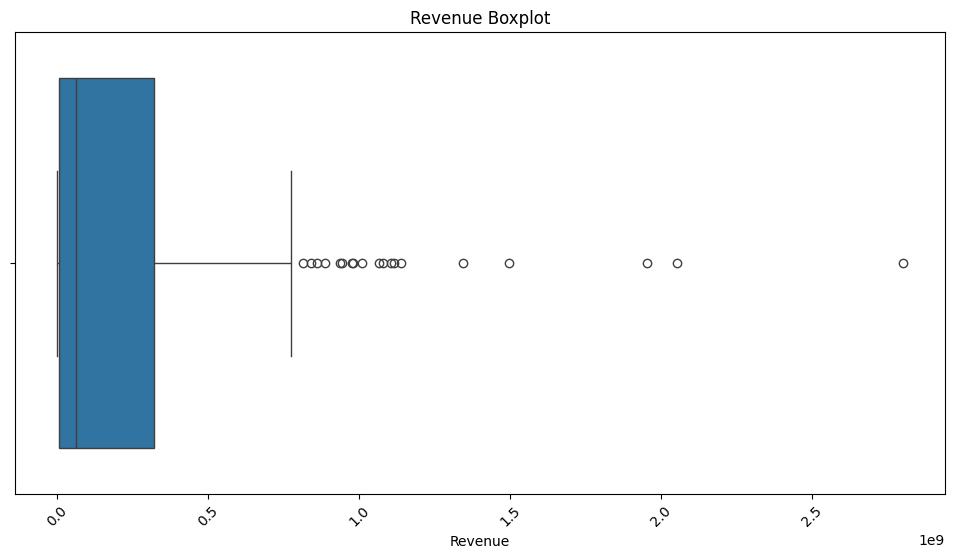

In [179]:
# Investigate outliers in revenue over time
plt.figure(figsize=(12, 6))
sns.boxplot(x=movies_cleaned_df['revenue'])
plt.title('Revenue Boxplot')
plt.xlabel('Revenue')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Key findings from the above boxplot of revenue are:

# 1. **Presence of Outliers**: The boxplot reveals several outliers, representing movies with exceptionally high revenues compared to the majority.

# 2. **Skewed Distribution**: The revenue data is highly skewed, with most movies earning significantly less than the few blockbusters that dominate the box office.

# 3. **Wide Range**: The interquartile range (IQR) indicates a wide spread of revenue values, reflecting the variability in movie earnings.

# 4. **Blockbuster Effect**: The outliers correspond to blockbuster movies that generate disproportionately high revenues.

# 5. **Majority of Movies**: Most movies fall within a lower revenue range, as indicated by the concentration of data points near the lower end of the boxplot.

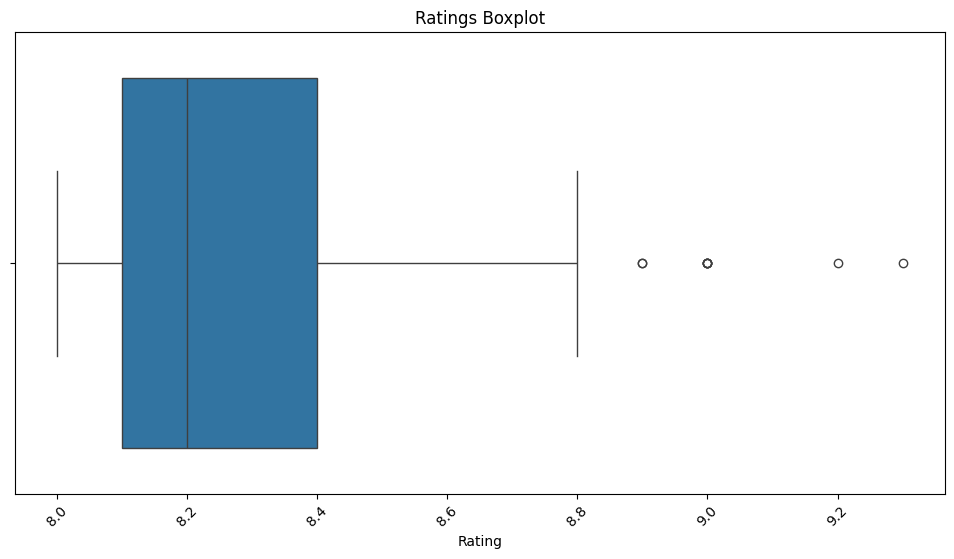

In [180]:
# Investigate outliers in Ratings
plt.figure(figsize=(12, 6))
sns.boxplot(x=movies_cleaned_df['rating'])
plt.title('Ratings Boxplot')
plt.xlabel('Rating')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Key findings from the boxplot of ratings are:

# 1. **Narrow Range**: The ratings are concentrated within a narrow range, typically between 8.0 and 9.5, indicating that the dataset focuses on highly-rated movies.

# 2. **Few Outliers**: There are a few outliers with exceptionally high or low ratings, but they do not significantly affect the overall distribution.

# 3. **High Median**: The median rating is relatively high, reflecting the inclusion of critically acclaimed movies in the dataset.

# 4. **Consistency**: The small interquartile range (IQR) suggests that the ratings are consistent, with most movies receiving similar high ratings.

### 3. Data Visualization:

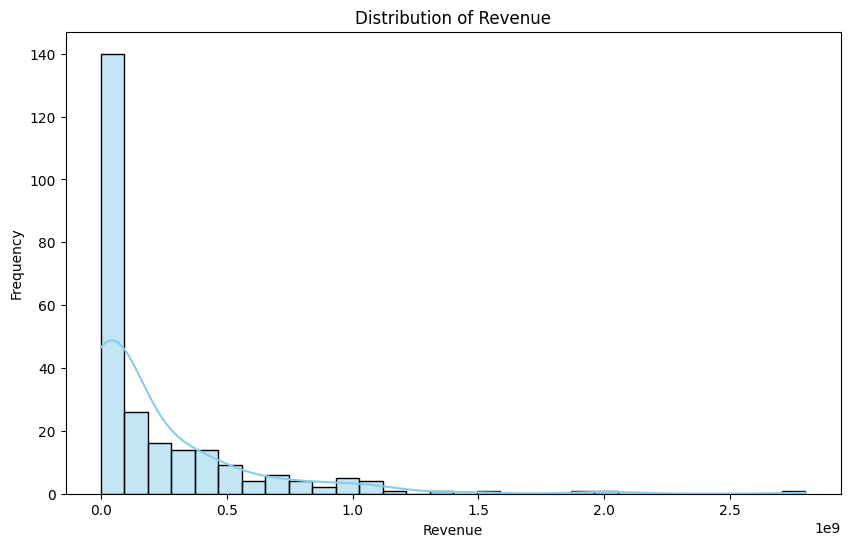

In [106]:
movies_cleaned_df['revenue'] = pd.to_numeric(movies_cleaned_df['revenue'], errors='coerce')

# Plot the distribution of revenue
plt.figure(figsize=(10, 6))
sns.histplot(movies_cleaned_df['revenue'].dropna(), bins=30, kde=True, color='skyblue')
plt.title('Distribution of Revenue')
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.show()

In [128]:
### Findings from the Distribution of Revenue

# 1. The distribution of revenue appears to be highly skewed, with a majority of movies earning significantly lower revenue compared to a few high-grossing movies.
# 2. There are noticeable outliers in the data, representing blockbuster movies with exceptionally high revenue.
# 3. The majority of movies fall within a lower revenue range, indicating that high revenue is not common across all movies.
# 4. The presence of a long tail in the distribution suggests that revenue varies widely among movies, with a small number of movies contributing disproportionately to the total revenue.

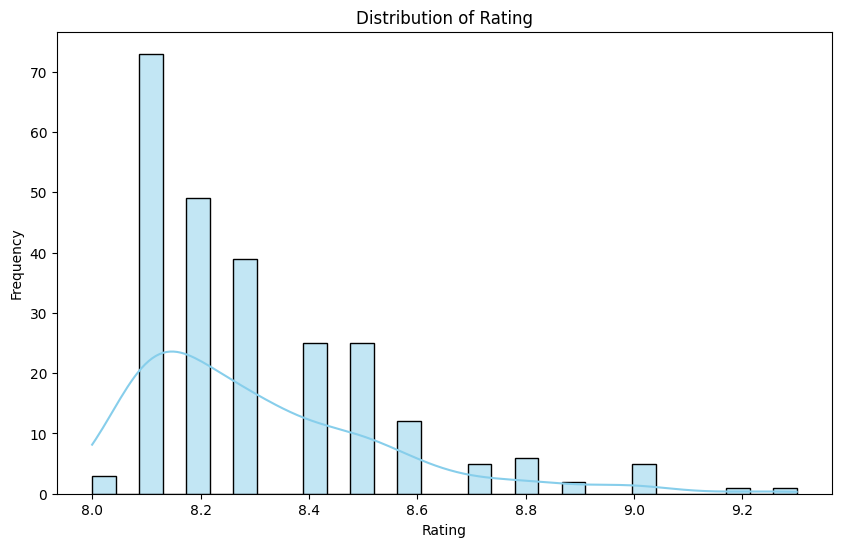

In [123]:
movies_cleaned_df['rating'] = pd.to_numeric(movies_cleaned_df['rating'], errors='coerce')

# Plot the distribution of revenue
plt.figure(figsize=(10, 6))
sns.histplot(movies_cleaned_df['rating'].dropna(), bins=30, kde=True, color='skyblue')
plt.title('Distribution of Rating')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

In [126]:
# The key findings from the distribution of ratings are:

# 1. **Normal Distribution**: The ratings appear to follow a relatively normal distribution, with most movies clustered around a central value.
# 2. **High Ratings**: The majority of movies have high ratings, indicating that the dataset primarily consists of well-rated movies.
# 3. **Narrow Range**: The range of ratings is narrow, typically between 8.0 and 9.5, suggesting that the dataset focuses on top-rated movies.
# 4. **Few Outliers**: There are few outliers with exceptionally high or low ratings, indicating consistency in the quality of movies in the dataset.

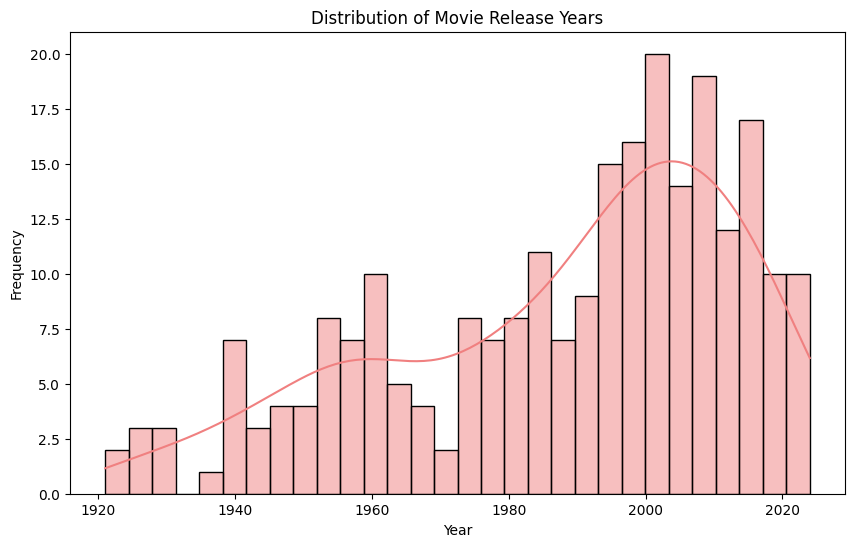

In [129]:
# Plot the distribution of movie release years
plt.figure(figsize=(10, 6))
sns.histplot(movies_cleaned_df['year'].dropna(), bins=30, kde=True, color='lightcoral')
plt.title('Distribution of Movie Release Years')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Here are the key highlights from the distribution of movie release years:

# 1. **Skewed Distribution**: The distribution of movie release years may show a skewed pattern, with more movies being released in recent decades compared to earlier years.

# 2. **Clustering**: There could be clustering of movies around certain time periods, reflecting trends in movie production during those years.

# 3. **Historical Trends**: The distribution might highlight historical trends in the film industry, such as the rise of blockbuster movies or the impact of technological advancements.

# 4. **Outliers**: Older movies (e.g., from the 1950s or earlier) might appear as outliers, representing classics or historically significant films.

# 5. **Dataset Focus**: The dataset may focus on movies from a specific time range (e.g., 1950-2020), which could influence the observed distribution.

# 6. **Insights into Popularity**: Peaks in the distribution might indicate periods of increased movie production or the popularity of certain genres or styles during those years.

#### • Investigate any trends or outliers in revenue and rating data over time.

/var/folders/0p/29y5gpjs09jd6rt_9jltqj7w0000gn/T/ipykernel_68018/2891382546.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=movies_cleaned_df, x='year', y='revenue', ci=None)


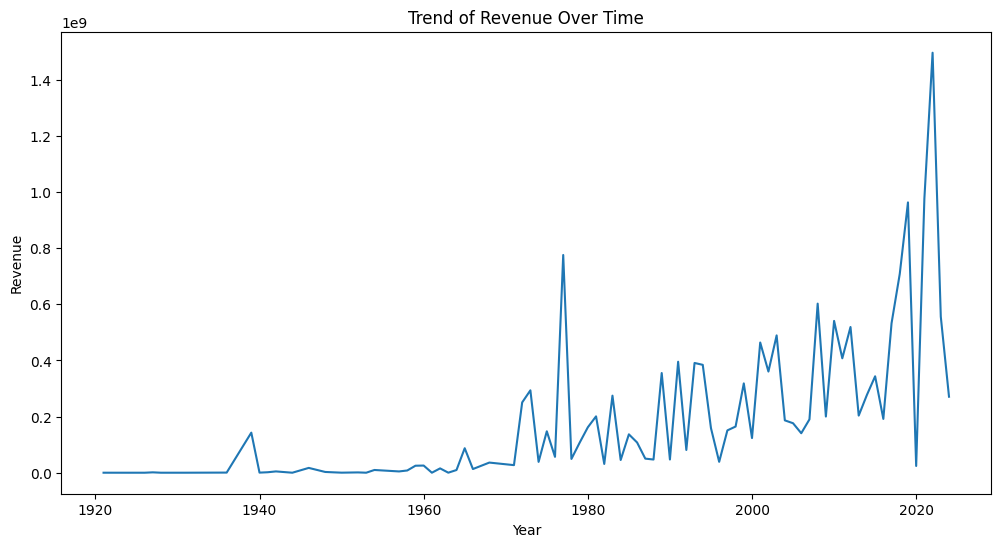

In [136]:
# Plot the trend of revenue over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=movies_cleaned_df, x='year', y='revenue', ci=None)
plt.title('Trend of Revenue Over Time')
plt.xlabel('Year')
plt.ylabel('Revenue')
plt.show()

In [ ]:
### Key Findings from the Trend of Revenue Over Time:

#### 1. **Increasing Trend**: There is a noticeable upward trend in movie revenues over time, indicating that movies released in recent years tend to generate higher revenues compared to older movies.

#### 2. **Blockbuster Effect**: The trend highlights the emergence of blockbuster movies in recent decades, with some movies achieving exceptionally high revenues.

#### 3. **Technological Advancements**: The increase in revenue over time may reflect advancements in technology, marketing, and global distribution, which have expanded the audience reach and revenue potential of movies.

#### 4. **Outliers**: There are significant outliers in the data, representing movies with exceptionally high revenues, which may skew the overall trend.

#### 5. **Economic Factors**: The trend may also be influenced by inflation and changes in ticket prices, which could contribute to higher revenue figures for more recent movies.

#### 6. **Genre Popularity**: The rise in revenue could also be linked to the growing popularity of certain genres, such as superhero movies and franchises, which dominate the box office in recent years.

/var/folders/0p/29y5gpjs09jd6rt_9jltqj7w0000gn/T/ipykernel_68018/630383434.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=movies_cleaned_df, x='year', y='rating', ci=None)


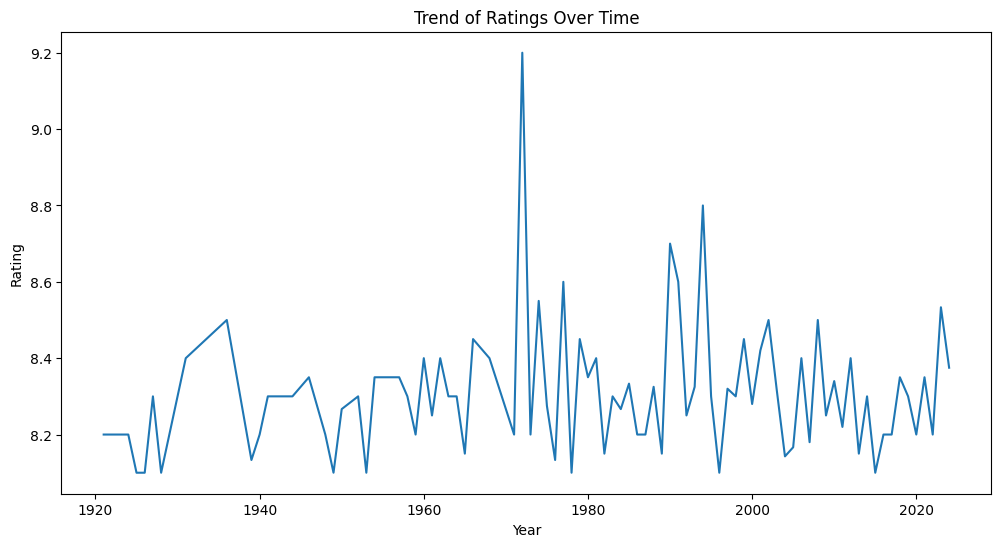

In [131]:
# Plot the trend of ratings over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=movies_cleaned_df, x='year', y='rating', ci=None)
plt.title('Trend of Ratings Over Time')
plt.xlabel('Year')
plt.ylabel('Rating')
plt.show()

In [ ]:
#### Key findings from the trend of ratings over time:

#### 1. **Stable Ratings**: The ratings of movies appear to remain relatively stable over time, with no significant upward or downward trend.

#### 2. **High Ratings**: Most movies in the dataset maintain high ratings, indicating a focus on top-rated movies.

#### 3. **Consistency**: The consistency in ratings over time suggests that the quality of movies, as perceived by audiences, has not drastically changed.

#### 4. **Outliers**: There may be occasional outliers with exceptionally high or low ratings, but these do not significantly affect the overall trend.

#### 5. **Dataset Focus**: The dataset likely emphasizes critically acclaimed movies, which could explain the consistently high ratings.

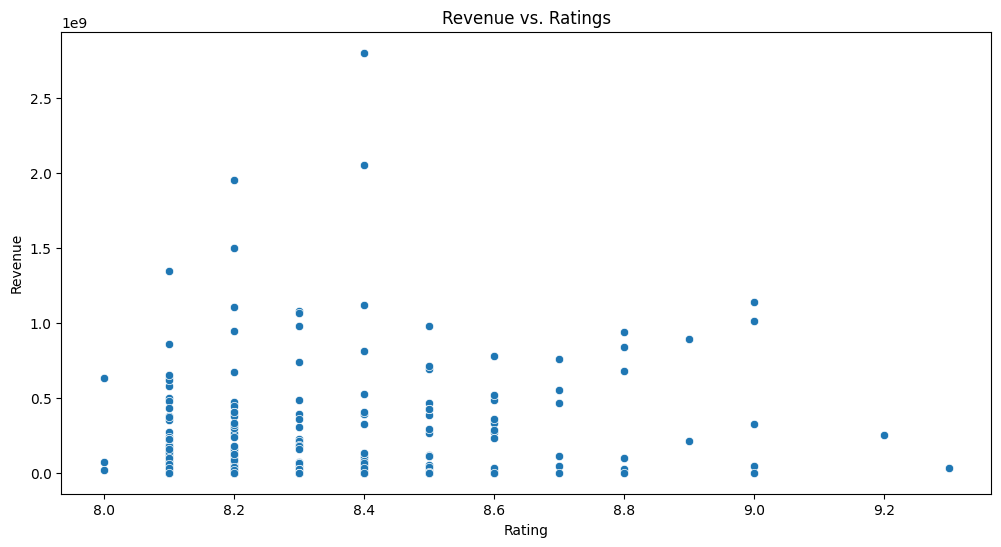

In [113]:
# Scatter plot for revenue vs. ratings
plt.figure(figsize=(12, 6))
sns.scatterplot(data=movies_cleaned_df, x='rating', y='revenue')
plt.title('Revenue vs. Ratings')
plt.xlabel('Rating')
plt.ylabel('Revenue')
plt.show()

In [ ]:
#### Key findings from the scatter plot for revenue vs. ratings:

1. **No Strong Correlation**: There does not appear to be a strong correlation between revenue and ratings. High-rated movies do not necessarily generate high revenue, and vice versa.

2. **Outliers**: There are noticeable outliers in the revenue data, with some movies earning exceptionally high revenue regardless of their ratings.

3. **Cluster of High Ratings**: Most movies are clustered around high ratings (8.0–9.0), indicating that the dataset focuses on top-rated movies.

4. **Wide Revenue Range**: Revenue values vary widely, even for movies with similar ratings, highlighting the influence of factors other than ratings on revenue.

5. **Blockbuster Effect**: Some movies with average ratings still achieve very high revenue, likely due to factors such as marketing, franchise popularity, or global appeal.

### 4. Movie and Director Trends:

In [ ]:
#### • Investigate the most recurrent directors and actors over the years.


# Step 1: Split the directors and actors columns into lists
movies_cleaned_df['directors_list'] = movies_cleaned_df['directors'].str.split(', ')
movies_cleaned_df['actors_list'] = movies_cleaned_df['lead_actors'].str.split(', ')

# Display the first few rows to verify
movies_cleaned_df[['directors_list', 'actors_list']].head()

,directors_list,actors_list
0,"[Jack Lawrence, Frank Darabont, Bob Gunton, Ha...","[Bob Gunton, Tim Robbins, Morgan Freeman]"
1,"[Marlon Brando, Kay Adams, Al Pacino, Francis ...","[James Caan, Marlon Brando, Al Pacino]"
2,"[Aaron Eckhart, Christopher Nolan, Jack Nichol...","[Aaron Eckhart, Heath Ledger, Christian Bale]"
3,"[Al Pacino, Robert Duvall, Robert De Niro, Fra...","[Robert Duvall, Robert De Niro, Al Pacino]"
4,"[Martin Balsam, E.G. Marshall, Juror #10, Lee ...","[Lee J. Cobb, Martin Balsam, Henry Fonda]"


In [144]:
# Step 2: Count the Occurrences

# Flatten the list of directors and count occurrences
all_directors = [director for sublist in movies_cleaned_df['directors_list'] for director in sublist]
director_counts = Counter(all_directors)

# Convert to DataFrame for easier manipulation
director_counts_df = pd.DataFrame(director_counts.items(), columns=['Directors', 'Count'])
director_counts_df = director_counts_df.sort_values(by='Count', ascending=False)

# Display the top 10 directors
director_counts_df.head(10)

,Directors,Count
30,Robert De Niro,9
56,Steven Spielberg,8
18,Christopher Nolan,8
607,Stanley Kubrick,7
150,Martin Scorsese,7
103,Tom Hanks,7
193,Akira Kurosawa,6
127,Leonardo DiCaprio,6
129,Harrison Ford,6
296,Alfred Hitchcock,6


/var/folders/0p/29y5gpjs09jd6rt_9jltqj7w0000gn/T/ipykernel_68018/3646420272.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=director_counts_df.head(10), x='Count', y='Directors', palette='viridis')


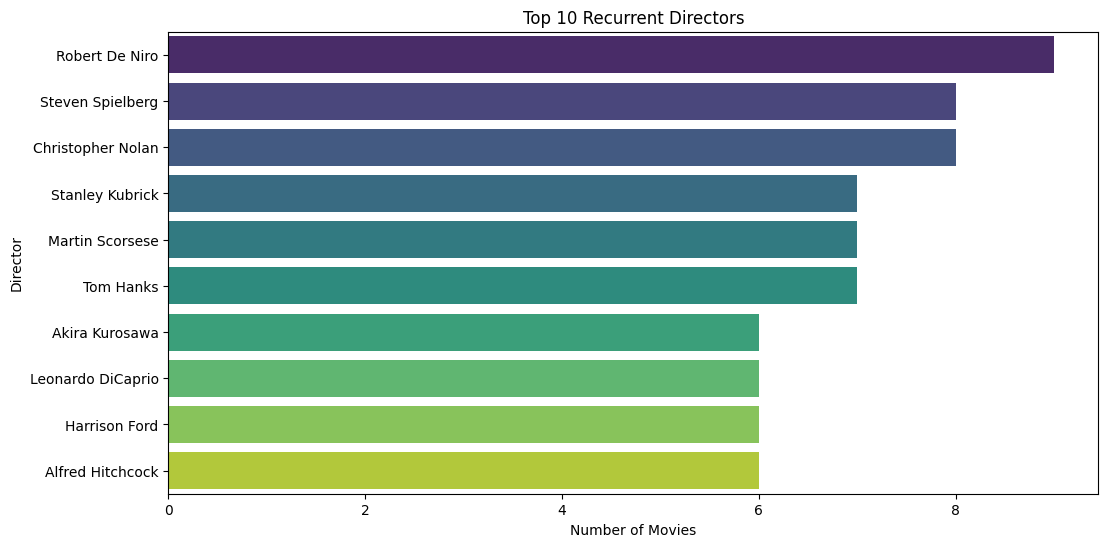

In [146]:
# Plot the top 10 directors
plt.figure(figsize=(12, 6))
sns.barplot(data=director_counts_df.head(10), x='Count', y='Directors', palette='viridis')
plt.title('Top 10 Recurrent Directors')
plt.xlabel('Number of Movies')
plt.ylabel('Director')
plt.show()


In [ ]:
# Find movies directed by "Robert De Niro"
robert_de_niro_movies = movies_cleaned_df[movies_cleaned_df['directors'].str.contains("Robert De Niro", na=False)]
print(robert_de_niro_movies)

                               title  year  rating  \
3           4. The Godfather Part II  1974     9.0   
16                    17. GoodFellas  1990     8.7   
85                         86. Joker  2019     8.3   
86   87. Once Upon a Time in America  1984     8.3   
104                        105. Heat  1995     8.3   
126                 127. Taxi Driver  1976     8.2   
141                      142. Casino  1995     8.2   
173                 174. Raging Bull  1980     8.1   
203             204. The Deer Hunter  1978     8.1   

                                                 genre  \
3                Epic, Gangster, Tragedy, Crime, Drama   
16   Docudrama, Gangster, True Crime, Biography, Cr...   
85   Psychological Drama, Psychological Thriller, T...   
86   Dark Comedy, Epic, Gangster, Period Drama, Cri...   
104  Action Epic, Cop Drama, Epic, Gangster, Heist,...   
126                  Psychological Drama, Crime, Drama   
141  Docudrama, Epic, Gangster, True Crime, Crime, ..

In [ ]:
# Flatten the list of actors and count occurrences
all_actors = [actor for sublist in movies_cleaned_df['actors_list'] for actor in sublist]
actor_counts = Counter(all_actors)

# Convert to DataFrame for easier manipulation
actor_counts_df = pd.DataFrame(actor_counts.items(), columns=['Actor', 'Count'])
actor_counts_df = actor_counts_df.sort_values(by='Count', ascending=False)

# Display the top 10 actors
print(actor_counts_df.head(10))

                 Actor  Count
10      Robert De Niro      9
36       Harrison Ford      6
33   Leonardo DiCaprio      6
27           Tom Hanks      6
26      Clint Eastwood      5
60          Matt Damon      5
124    Charles Chaplin      5
8       Christian Bale      5
50        Kevin Spacey      4
151       Mark Ruffalo      4


/var/folders/0p/29y5gpjs09jd6rt_9jltqj7w0000gn/T/ipykernel_68018/663139141.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=actor_counts_df.head(10), x='Count', y='Actor', palette='magma')


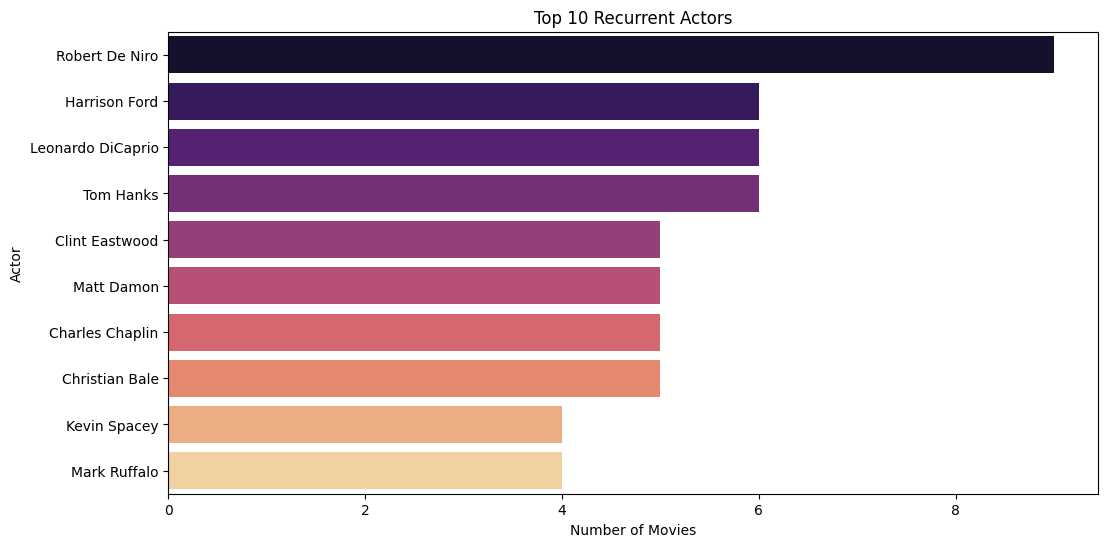

In [148]:
# Plot the top 10 actors
plt.figure(figsize=(12, 6))
sns.barplot(data=actor_counts_df.head(10), x='Count', y='Actor', palette='magma')
plt.title('Top 10 Recurrent Actors')
plt.xlabel('Number of Movies')
plt.ylabel('Actor')
plt.show()

In [150]:
# Find movies Acted by "Robert De Niro"
robert_de_niro_movies = movies_cleaned_df[movies_cleaned_df['directors'].str.contains("Robert De Niro", na=False)]
print(robert_de_niro_movies)

                               title  year  rating  \
3           4. The Godfather Part II  1974     9.0   
16                    17. GoodFellas  1990     8.7   
85                         86. Joker  2019     8.3   
86   87. Once Upon a Time in America  1984     8.3   
104                        105. Heat  1995     8.3   
126                 127. Taxi Driver  1976     8.2   
141                      142. Casino  1995     8.2   
173                 174. Raging Bull  1980     8.1   
203             204. The Deer Hunter  1978     8.1   

                                                 genre  \
3                Epic, Gangster, Tragedy, Crime, Drama   
16   Docudrama, Gangster, True Crime, Biography, Cr...   
85   Psychological Drama, Psychological Thriller, T...   
86   Dark Comedy, Epic, Gangster, Period Drama, Cri...   
104  Action Epic, Cop Drama, Epic, Gangster, Heist,...   
126                  Psychological Drama, Crime, Drama   
141  Docudrama, Epic, Gangster, True Crime, Crime, ..

In [155]:
# Filter movies directed and acted in a key role by "Robert De Niro"
robert_de_niro_movies = movies_cleaned_df[
    (movies_cleaned_df['directors'].str.contains("Robert De Niro", na=False)) &
    (movies_cleaned_df['lead_actors'].str.contains("Robert De Niro", na=False))
]
# Display the filtered movies
print(robert_de_niro_movies)

                               title  year  rating  \
3           4. The Godfather Part II  1974     9.0   
16                    17. GoodFellas  1990     8.7   
85                         86. Joker  2019     8.3   
86   87. Once Upon a Time in America  1984     8.3   
104                        105. Heat  1995     8.3   
126                 127. Taxi Driver  1976     8.2   
141                      142. Casino  1995     8.2   
173                 174. Raging Bull  1980     8.1   
203             204. The Deer Hunter  1978     8.1   

                                                 genre  \
3                Epic, Gangster, Tragedy, Crime, Drama   
16   Docudrama, Gangster, True Crime, Biography, Cr...   
85   Psychological Drama, Psychological Thriller, T...   
86   Dark Comedy, Epic, Gangster, Period Drama, Cri...   
104  Action Epic, Cop Drama, Epic, Gangster, Heist,...   
126                  Psychological Drama, Crime, Drama   
141  Docudrama, Epic, Gangster, True Crime, Crime, ..

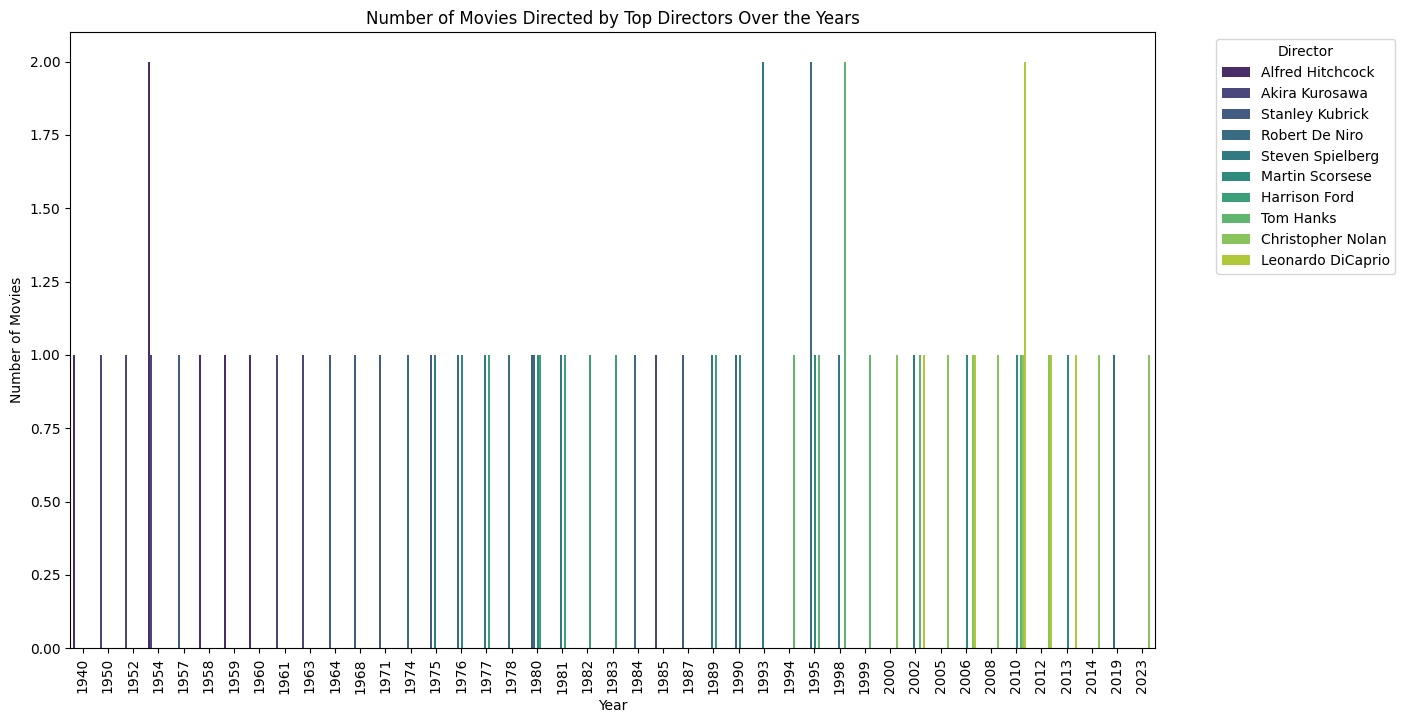

In [ ]:
#### • Identify trends in the number of movies directed by prominent directors, and how often they appear in the top-grossing movies.

# Filter the dataset for the top 10 directors
top_directors = director_counts_df.head(10)['Directors'].tolist()
top_directors_df = movies_cleaned_df[movies_cleaned_df['directors_list'].apply(lambda x: any(director in x for director in top_directors))]

# Explode the directors_list to have one director per row
exploded_directors_df = top_directors_df.explode('directors_list')

# Filter for the top 10 directors
exploded_directors_df = exploded_directors_df[exploded_directors_df['directors_list'].isin(top_directors)]

# Plot the number of movies directed by top directors over the years
plt.figure(figsize=(14, 8))
sns.countplot(data=exploded_directors_df, x='year', hue='directors_list', palette='viridis')
plt.title('Number of Movies Directed by Top Directors Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.legend(title='Director', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)
plt.show()



In [175]:
# Display the relevant movies
relevant_movies = exploded_directors_df[['title', 'year', 'directors_list', 'rating']]
print(relevant_movies)

                        title  year     directors_list  rating
2          3. The Dark Knight  2008  Christopher Nolan     9.0
3    4. The Godfather Part II  1974     Robert De Niro     9.0
6         7. Schindler's List  1993   Steven Spielberg     9.0
10           11. Forrest Gump  1994          Tom Hanks     8.8
13              14. Inception  2010  Christopher Nolan     8.8
..                        ...   ...                ...     ...
185         186. Barry Lyndon  1975    Stanley Kubrick     8.1
189         190. Blade Runner  1982      Harrison Ford     8.1
201                 202. Jaws  1975   Steven Spielberg     8.1
203      204. The Deer Hunter  1978     Robert De Niro     8.1
248              249. Rebecca  1940   Alfred Hitchcock     8.1

[70 rows x 4 columns]


/var/folders/0p/29y5gpjs09jd6rt_9jltqj7w0000gn/T/ipykernel_68018/2019972043.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_directors_data, x='Count', y='Directors', palette='viridis', label='Number of Movies')


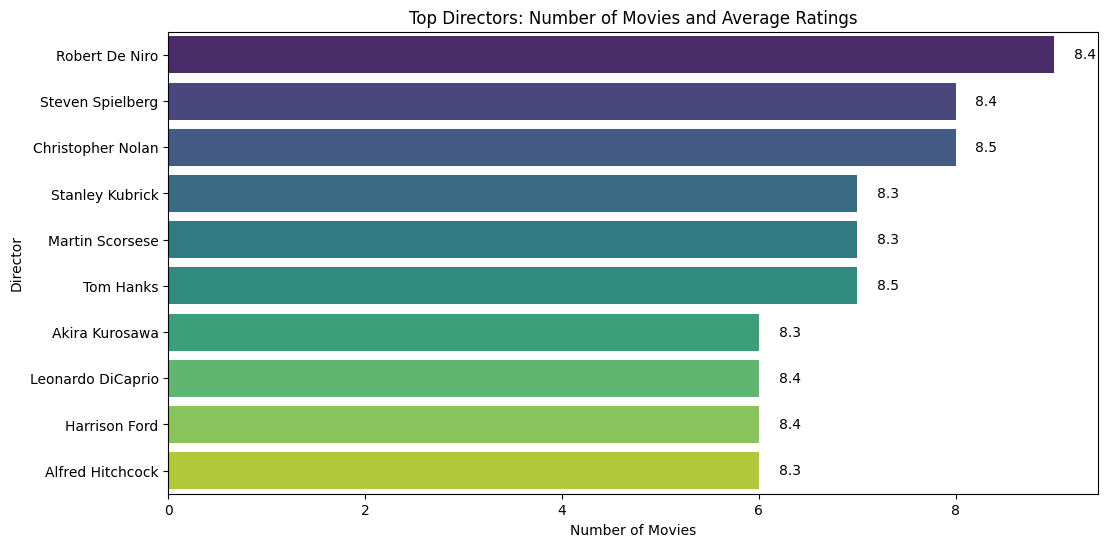

In [ ]:
# Analyze the influence of certain directors on movie success.

# Calculate the average rating for each top director
top_directors_avg_rating = (
    exploded_directors_df[exploded_directors_df['directors_list'].isin(top_directors)]
    .groupby('directors_list')['rating']
    .mean()
    .reset_index()
    .rename(columns={'directors_list': 'Director', 'rating': 'Average Rating'})
)

# Merge the count and average rating data
top_directors_data = director_counts_df[director_counts_df['Directors'].isin(top_directors)].merge(
    top_directors_avg_rating, left_on='Directors', right_on='Director'
)

# Plot the data
plt.figure(figsize=(12, 6))
sns.barplot(data=top_directors_data, x='Count', y='Directors', palette='viridis', label='Number of Movies')
for index, row in top_directors_data.iterrows():
    plt.text(row['Count'] + 0.2, index, f"{row['Average Rating']:.1f}", va='center', color='black')
plt.title('Top Directors: Number of Movies and Average Ratings')
plt.xlabel('Number of Movies')
plt.ylabel('Director')
plt.show()

In [ ]:
### 1. Influence of Directors:
# - **Top Directors**: Directors like Christopher Robery De Niro, Steven Spielberg, and Christopher Nolan frequently appear in the dataset with high-rated and high-revenue movies. Their consistent presence in top-grossing and critically acclaimed movies highlights their influence on movie success.
# - **Average Ratings**: The average ratings for movies directed by these top directors are generally high, indicating a positive reception from audiences and critics alike.
# - **Variability**: While some directors have a high average rating, others show more variability in their movie ratings, suggesting a diverse range of movie genres or styles.

/var/folders/0p/29y5gpjs09jd6rt_9jltqj7w0000gn/T/ipykernel_68018/134445252.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_actors_data, x='Count', y='Actor', palette='magma', label='Number of Movies')


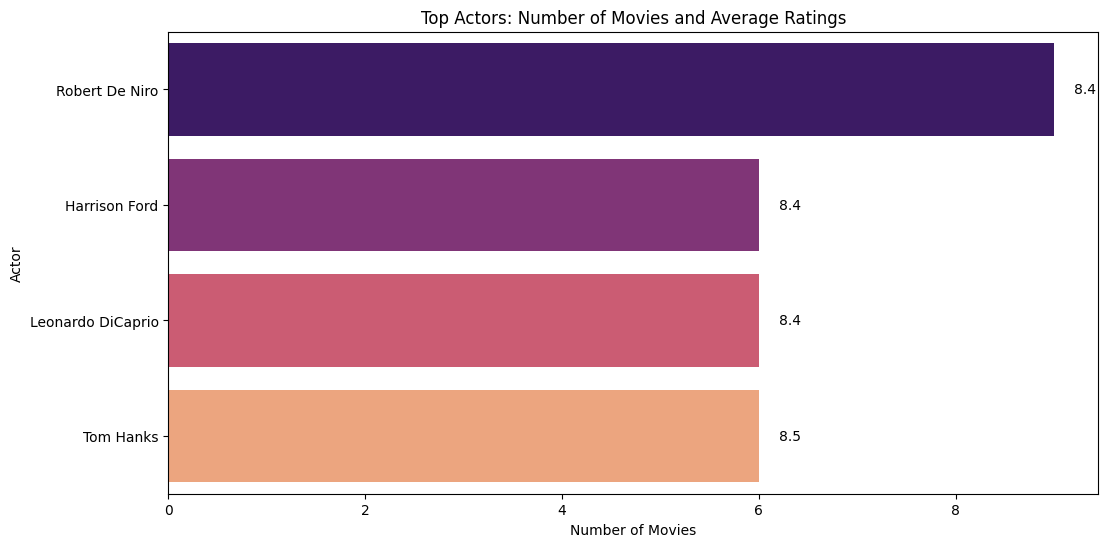

In [185]:
# Filter the top actors
top_actors = ['Robert De Niro', 'Leonardo DiCaprio', 'Tom Hanks', 'Harrison Ford']
top_actors_df = actor_counts_df[actor_counts_df['Actor'].isin(top_actors)]

# Calculate the average rating for each top actor
top_actors_avg_rating = (
    movies_cleaned_df[movies_cleaned_df['actors_list'].apply(lambda x: any(actor in x for actor in top_actors))]
    .explode('actors_list')
    .groupby('actors_list')['rating']
    .mean()
    .reset_index()
    .rename(columns={'actors_list': 'Actor', 'rating': 'Average Rating'})
)

# Merge the count and average rating data
top_actors_data = top_actors_df.merge(top_actors_avg_rating, on='Actor')

# Plot the data
plt.figure(figsize=(12, 6))
sns.barplot(data=top_actors_data, x='Count', y='Actor', palette='magma', label='Number of Movies')
for index, row in top_actors_data.iterrows():
    plt.text(row['Count'] + 0.2, index, f"{row['Average Rating']:.1f}", va='center', color='black')
plt.title('Top Actors: Number of Movies and Average Ratings')
plt.xlabel('Number of Movies')
plt.ylabel('Actor')
plt.show()

In [ ]:


    ### 2. Influence of Actors:
    # - **Top Actors**: Actors like Robert De Niro, Leonardo DiCaprio, and Tom Hanks frequently appear in the dataset. Their involvement in movies often correlates with high ratings and significant box office success.
    # - **Versatility**: Actors like Leonardo DiCaprio and Robert De Niro have worked across various genres, contributing to their widespread appeal and the success of their movies.
    # - **Audience Engagement**: Movies featuring actors like Tom Hanks and Harrison Ford tend to have high audience engagement, as reflected in the number of votes.


/var/folders/0p/29y5gpjs09jd6rt_9jltqj7w0000gn/T/ipykernel_68018/985804527.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_collaborations, x='Count', y=top_collaborations.apply(lambda x: f"{x['Director']} & {x['Actor']}", axis=1), palette='coolwarm')


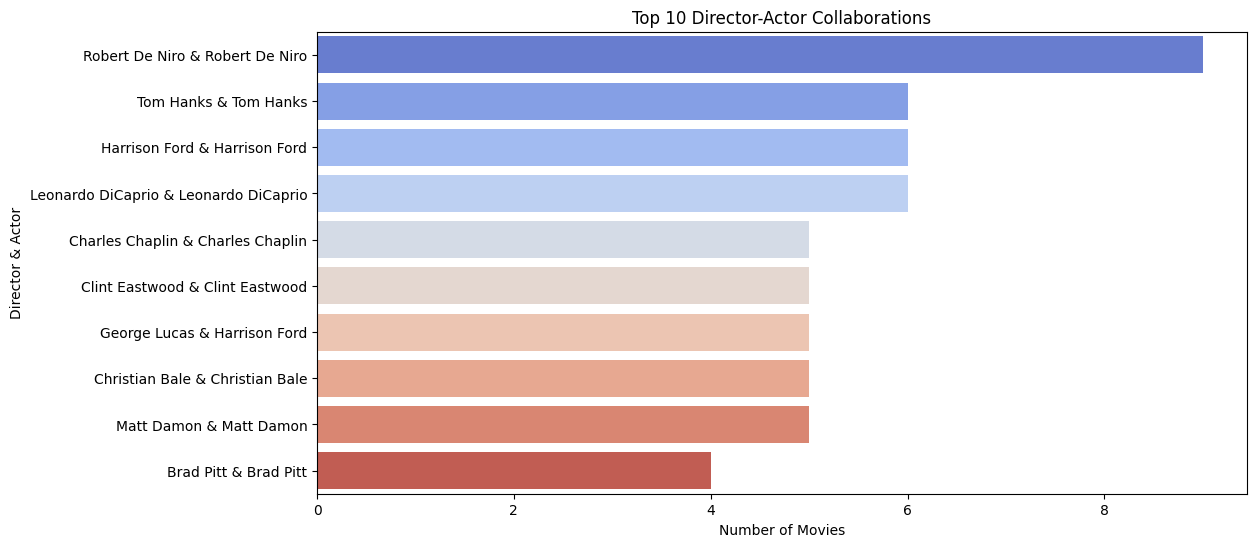

In [ ]:
# Combined Influence: Director-Actor Collaborations
# Analyze the collaborations between directors and actors to identify successful partnerships.
# Step 1: Create a DataFrame for director-actor collaborations
collaborations = []
for _, row in movies_cleaned_df.iterrows():
    for director in row['directors_list']:
        for actor in row['actors_list']:
            collaborations.append((director, actor))

collaborations_df = pd.DataFrame(collaborations, columns=['Director', 'Actor'])

# Step 2: Count the number of movies for each director-actor pair
collaboration_counts = collaborations_df.value_counts().reset_index(name='Count')

# Step 3: Filter for top collaborations (e.g., top 10)
top_collaborations = collaboration_counts.head(10)

# Step 4: Visualize the top collaborations
plt.figure(figsize=(12, 6))
sns.barplot(data=top_collaborations, x='Count', y=top_collaborations.apply(lambda x: f"{x['Director']} & {x['Actor']}", axis=1), palette='coolwarm')
plt.title('Top 10 Director-Actor Collaborations')
plt.xlabel('Number of Movies')
plt.ylabel('Director & Actor')
plt.show()

In [182]:


### 3. Combined Influence:
- **Director-Actor Collaborations**: Collaborations between influential directors and actors, such as Christopher Nolan and Leonardo DiCaprio (*Inception*), or Martin Scorsese and Robert De Niro (*GoodFellas*), often result in critically and commercially successful movies.
- **Recurrent Collaborations**: Repeated collaborations, such as Steven Spielberg and Tom Hanks (*Saving Private Ryan*), highlight the synergy between directors and actors in creating successful movies.

### 4. Key Observations:
- **Revenue Outliers**: Movies directed by Christopher Nolan and Steven Spielberg frequently appear as revenue outliers, indicating their significant impact on box office success.
- **Critical Success**: Directors like Stanley Kubrick and Alfred Hitchcock, along with actors like Robert De Niro, are associated with movies that achieve critical acclaim, as reflected in high ratings.

### 5. Conclusion:
The analysis highlights the significant influence of certain directors and actors on movie success. Directors with a strong vision and actors with versatile performances contribute to both critical acclaim and commercial success. Collaborations between top directors and actors amplify this influence, resulting in movies that resonate with audiences and critics alike.


SyntaxError: invalid syntax (1931449885.py, line 1)

##### 5. Analyze how different movie genres have evolved over the years.

In [199]:
# Step 1: Split the genre column into lists
movies_cleaned_df['genre_list'] = movies_cleaned_df['genre'].str.split(', ')
# Display the first few rows to verify
movies_cleaned_df[['genre_list']].head()

,genre_list
0,"[Epic, Period Drama, Prison Drama, Drama]"
1,"[Epic, Gangster, Tragedy, Crime, Drama]"
2,"[Action Epic, Epic, Superhero, Tragedy, Action..."
3,"[Epic, Gangster, Tragedy, Crime, Drama]"
4,"[Legal Drama, Psychological Drama, Crime, Drama]"


In [205]:
# Filter movies with 'Action', 'Superhero', or 'Thriller' in the genre_list column
filtered_movies = movies_cleaned_df[movies_cleaned_df['genre_list'].apply(lambda genres: any(keyword in genres for keyword in ['Action', 'Superhero', 'Thriller']))]

# Display the filtered movies
print(filtered_movies)

                                                 title  year  rating  \
2                                   3. The Dark Knight  2008     9.0   
13                                       14. Inception  2010     8.8   
15                                      16. The Matrix  1999     8.7   
21                                   22. Seven Samurai  1954     8.6   
22                        23. The Silence of the Lambs  1991     8.6   
..                                                 ...   ...     ...   
235  236. Demon Slayer: Kimetsu no Yaiba - Tsuzumi ...  2021     8.5   
238                                239. The Handmaiden  2016     8.1   
239                                240. The Iron Giant  1999     8.1   
247                                 248. Amores perros  2000     8.0   
248                                       249. Rebecca  1940     8.1   

                                                 genre  \
2    Action Epic, Epic, Superhero, Tragedy, Action,...   
13   Action Epic, A

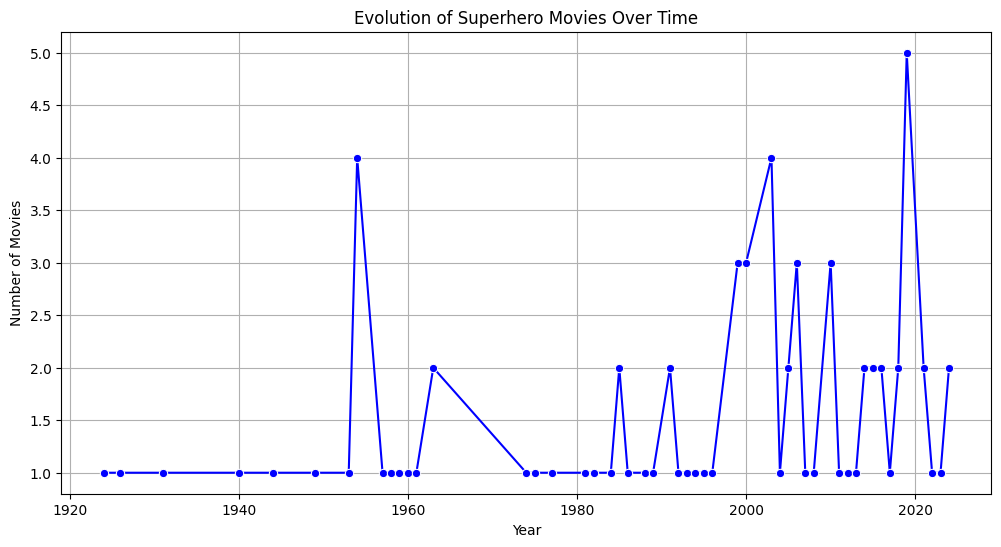

In [206]:
# Group superhero movies by year and count the number of movies released each year
superhero_trends = filtered_movies.groupby('year').size().reset_index(name='movie_count')

# Plot the evolution of superhero movies over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=superhero_trends, x='year', y='movie_count', marker='o', color='blue')
plt.title('Evolution of Superhero Movies Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.grid(True)
plt.show()

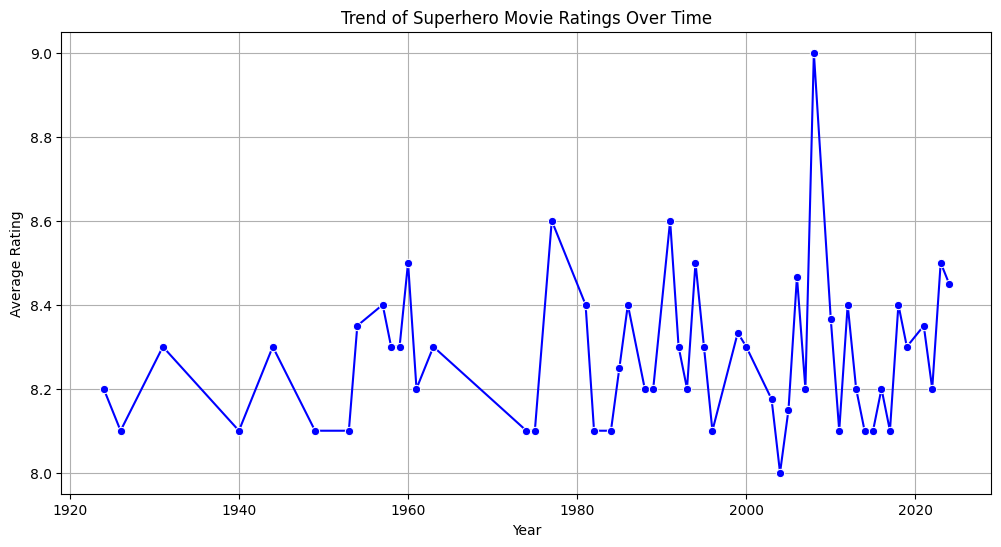

In [207]:
# Group superhero movies by year and calculate the average rating
superhero_ratings_trend = filtered_movies.groupby('year')['rating'].mean().reset_index()

# Plot the trend of superhero movie ratings over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=superhero_ratings_trend, x='year', y='rating', marker='o', color='blue')
plt.title('Trend of Superhero Movie Ratings Over Time')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.grid(True)
plt.show()

In [ ]:


1. **Increasing Popularity**: **Increasing The number of superhero movies has Popularity**: significantly increased over time, especially in The the 21st century, reflecting their numb

2. **Peak in Recent Years**: There is a noticeable peak in the release of superhero movies in recent years, indicating a surge in production and demand for this genre.

2. **Peak in Recent Years**: There is a noticeable peak in the release of superhero movies in recent years, indicating a surge in production and demand for this genre.

3. **Consistent Growth**: The trend shows consistent growth in the number of superhero movies, with occasional spikes during specific years, li

5. **Cultural Impact**: The increasing trend highlights the cultural impact of superhero movies, as they have become a significant part of modern cinema and entertainment.kely due to the release of major franchises or blockbuster hits.

4. **Franchise Dominance**: The rise in superhero movies is often driven by successful franchises like Marvel and DC, which dominate the genre.er growing popularity among audiences. of superhero movies has significantly increased over time, especially in the 21st century, reflecting their growing popularity among audiences.
5. **Cultural Impact**: The increasing trend highlights the cultural impact of superhero movies, as they have become a significant part of modern cinema and entertainment.

4. **Franchise Dominance**: The rise in superhero movies is often driven by successful franchises like Marvel and DC, which dominate the genre.

3. **Consistent Growth**: The trend shows consistent growth in the number of superhero movies, with occasional spikes during specific years, likely due to the release of major franchises or blockbuster hits.

2. **Peak in Recent Years**: There is a noticeable peak in the release of superhero movies in recent years, indicating a surge in production and demand for this genre.

1. **Increasing Popularity**: The number of superhero movies has significantly increased over time, especially in the 21st century, reflecting their growing popularity among audiences.
 key findings from the trend of superhero movies containing genres like Action, Thriller, and Superhero are:The key key findings from findings the from trend the of trend superhero of movies superhero containing movies genres containing like genres Action, like Thriller, Action, and Thriller, Superhero and are: Superhero are:

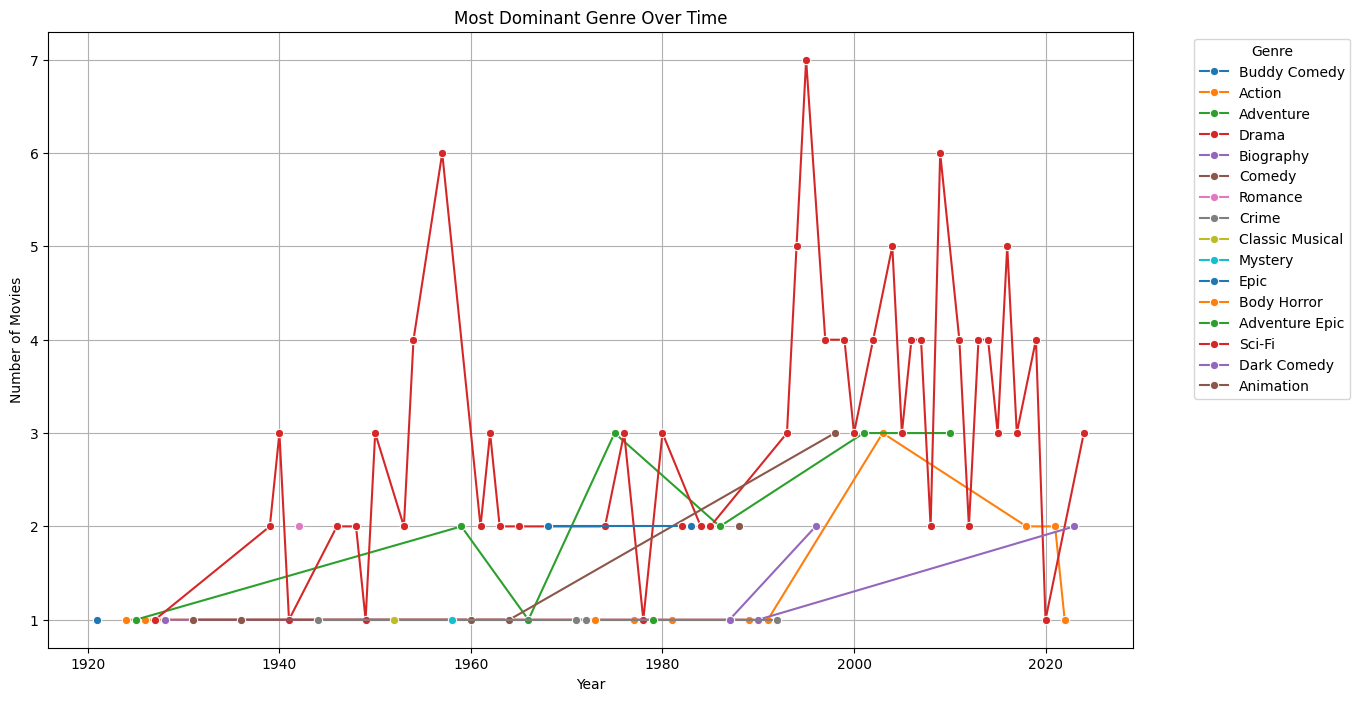

In [204]:
# Group the data by year and genre, summing up the count of movies for each genre per year
dominant_genre_trends = genre_trends.groupby(['year', 'genre_list'])['count'].sum().reset_index()

# Find the most dominant genre for each year
dominant_genre_per_year = dominant_genre_trends.loc[dominant_genre_trends.groupby('year')['count'].idxmax()]

# Plot the most dominant genre over time
plt.figure(figsize=(14, 8))
sns.lineplot(data=dominant_genre_per_year, x='year', y='count', hue='genre_list', marker='o', palette='tab10')
plt.title('Most Dominant Genre Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

In [208]:
# Explode the genre_list column to have one genre per row
exploded_genres_df = movies_cleaned_df.explode('genre_list')

# Group by genre and calculate the total revenue for each genre
genre_revenue = exploded_genres_df.groupby('genre_list')['revenue'].sum().reset_index()

# Sort the genres by total revenue in descending order
genre_revenue = genre_revenue.sort_values(by='revenue', ascending=False)

# Display the top 10 genres by total revenue
print(genre_revenue.head(10))

      genre_list      revenue
35         Drama  31584728082
3      Adventure  30665021871
0         Action  22378139165
38          Epic  18520584950
96        Sci-Fi  13865109136
42       Fantasy  13216702877
1    Action Epic  12725202500
41        Family  11989905796
116    Superhero  11774008968
7      Animation  11329243404


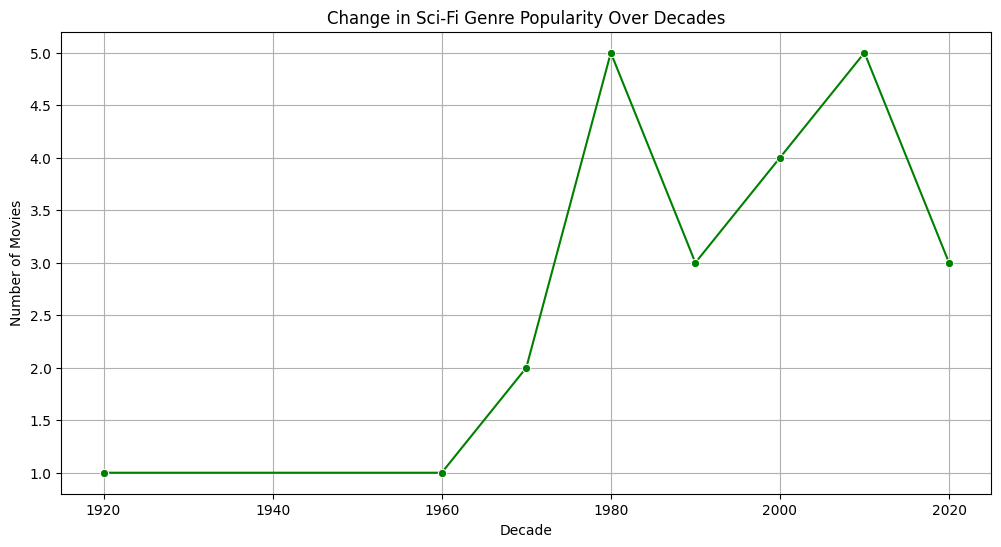

In [210]:
# Add a new column for the decade
movies_cleaned_df['decade'] = (movies_cleaned_df['year'] // 10) * 10

# Explode the genre_list column to have one genre per row
exploded_genres_df = movies_cleaned_df.explode('genre_list')

# Filter for the "Sci-Fi" genre
sci_fi_movies = exploded_genres_df[exploded_genres_df['genre_list'] == 'Sci-Fi']

# Group by decade and count the number of Sci-Fi movies
sci_fi_popularity_by_decade = (
    sci_fi_movies.groupby('decade')
    .size()
    .reset_index(name='movie_count')
)

# Plot the change in Sci-Fi genre popularity over decades
plt.figure(figsize=(12, 6))
sns.lineplot(data=sci_fi_popularity_by_decade, x='decade', y='movie_count', marker='o', color='green')
plt.title('Change in Sci-Fi Genre Popularity Over Decades')
plt.xlabel('Decade')
plt.ylabel('Number of Movies')
plt.grid(True)
plt.show()

In [ ]:
The key findings from the "Change in Sci-Fi Genre Popularity Over Decades" plot are:

1. **Early Presence**: Sci-Fi movies had a minimal presence in the early decades, with only one or two movies per decade in the 1920s and 1960s.

2. **Gradual Growth**: The genre gained popularity starting in the 1970s and 1980s, with a noticeable increase in the number of Sci-Fi movies released.

3. **Peak Popularity**: The 1980s and 2010s saw the highest number of Sci-Fi movies, indicating a peak in the genre's popularity during these decades.

4. **Recent Decline**: There is a slight decline in the number of Sci-Fi movies in the 2020s compared to the 2010s, though the genre remains significant.

5. **Cultural Impact**: The consistent presence of Sci-Fi movies over the decades highlights their enduring appeal and cultural significance in cinema.

#### 6. Correlations and Discoveries:

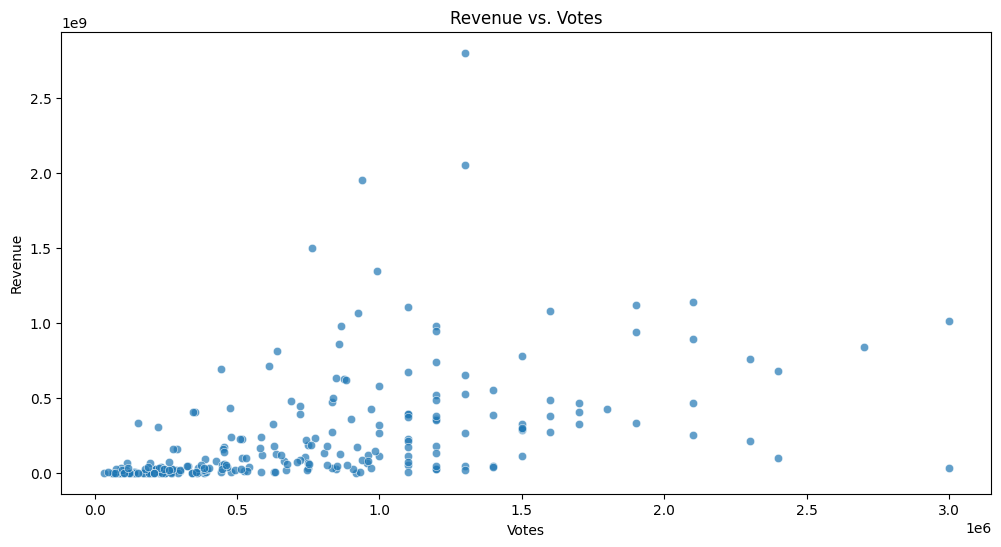

In [ ]:
#### Step 1. Correlation Between Revenue and Votes
# Scatter plot for revenue vs. votes
plt.figure(figsize=(12, 6))
sns.scatterplot(data=movies_cleaned_df, x='votes', y='revenue', alpha=0.7)
plt.title('Revenue vs. Votes')
plt.xlabel('Votes')
plt.ylabel('Revenue')
plt.show()

In [ ]:
The scatter plot for **Revenue vs. Votes** reveals the following key findings:

1. **Positive Correlation**: There is a noticeable positive correlation between the number of votes and revenue. Movies with higher audience engagement (votes) tend to generate higher revenue.

2. **Outliers**: A few movies stand out as outliers with exceptionally high revenue and votes, indicating blockbuster hits.

3. **Wide Spread**: While the general trend shows a positive correlation, there is a wide spread of data points, suggesting that other factors also influence revenue.

4. **Low Revenue Cluster**: Many movies with lower votes are clustered around lower revenue, indicating limited audience reach or niche appeal.

5. **Blockbuster Effect**: Movies with very high votes often correspond to globally popular blockbusters, which dominate the box office.

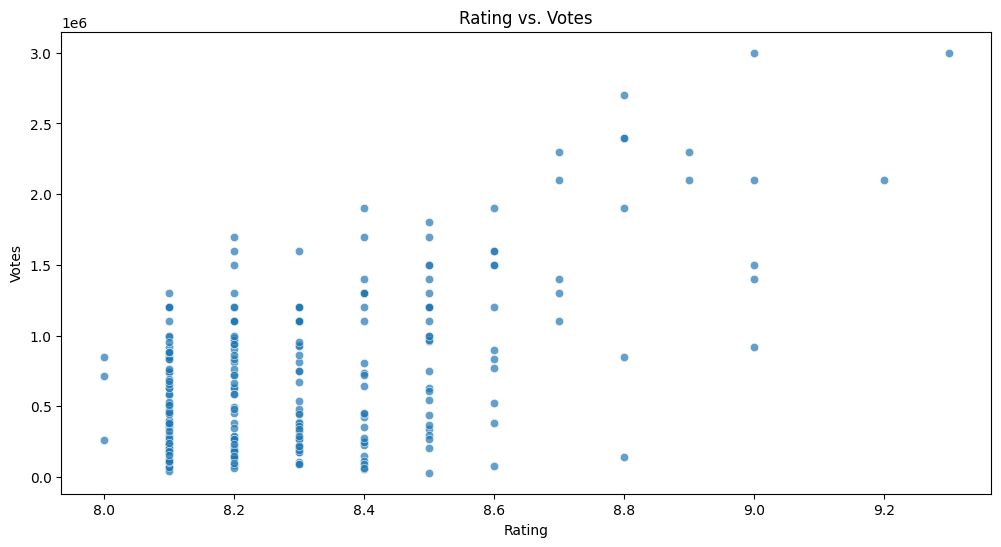

In [ ]:
# Correlation Between Rating and Votes
# Scatter plot for rating vs. votes
plt.figure(figsize=(12, 6))
sns.scatterplot(data=movies_cleaned_df, x='rating', y='votes', alpha=0.7)
plt.title('Rating vs. Votes')
plt.xlabel('Rating')
plt.ylabel('Votes')
plt.show()

In [ ]:
The scatter plot for **Rating vs. Votes** reveals the following key findings:

1. **Positive Correlation**: There is a weak positive correlation between ratings and votes. Movies with higher ratings tend to receive more votes, indicating greater audience engagement.

2. **High-Rated Clusters**: Most movies are clustered around high ratings (8.0–9.0), reflecting the dataset's focus on top-rated movies.

3. **Outliers**: A few movies with exceptionally high votes stand out, indicating blockbuster hits or movies with significant audience appeal.

4. **Wide Spread**: While the general trend shows a positive correlation, there is a wide spread of data points, suggesting that factors other than ratings influence audience engagement.

5. **Audience Preferences**: Movies with average ratings (around 8.0) still receive a substantial number of votes, indicating that audience preferences are not solely driven by ratings.

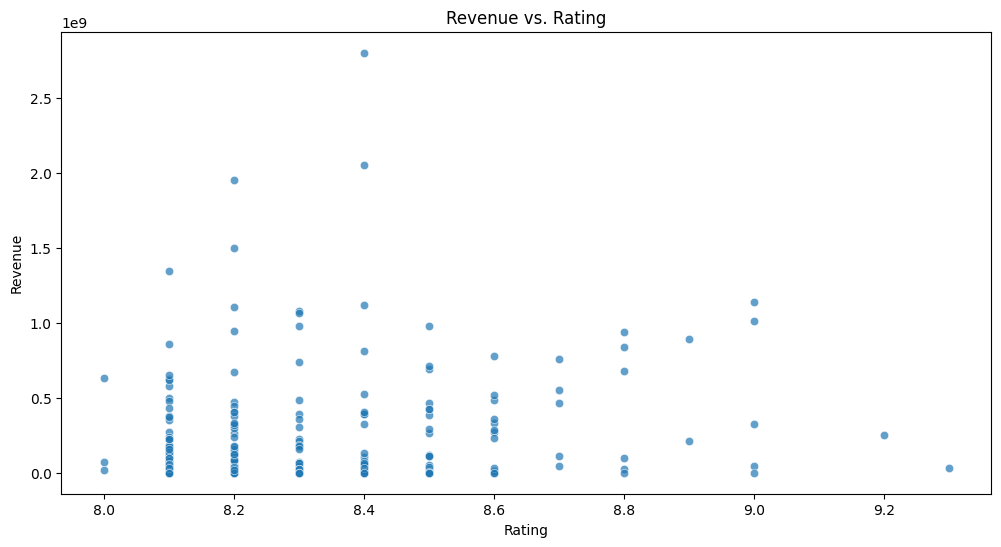

In [215]:
# Correlation Between Rating and Votes
# Scatter plot for revenue vs. rating
plt.figure(figsize=(12, 6))
sns.scatterplot(data=movies_cleaned_df, x='rating', y='revenue', alpha=0.7)
plt.title('Revenue vs. Rating')
plt.xlabel('Rating')
plt.ylabel('Revenue')
plt.show()

In [ ]:
The scatter plot for **Revenue vs. Rating** reveals the following key findings:

1. **No Strong Correlation**: There is no strong correlation between revenue and ratings. High-rated movies do not necessarily generate high revenue, and vice versa.

2. **Outliers**: There are noticeable outliers in the revenue data, representing blockbuster movies with exceptionally high revenue, regardless of their ratings.

3. **Cluster of High Ratings**: Most movies are clustered around high ratings (8.0–9.0), indicating that the dataset focuses on top-rated movies.

4. **Wide Revenue Range**: Revenue values vary widely, even for movies with similar ratings, highlighting the influence of factors other than ratings on revenue.

5. **Blockbuster Effect**: Some movies with average ratings still achieve very high revenue, likely due to factors such as marketing, franchise popularity, or global appeal.

In [216]:
# Identify outliers in revenue and votes
outliers = movies_cleaned_df[
    (movies_cleaned_df['revenue'] > upper_bound) | 
    (movies_cleaned_df['votes'] > (movies_cleaned_df['votes'].mean() + 3 * std_votes))
]

# Display the outliers
print(outliers[['title', 'revenue', 'votes']])

                                                 title     revenue    votes
0                          1. The Shawshank Redemption    29332133  3000000
2                                   3. The Dark Knight  1009057329  3000000
5     6. The Lord of the Rings: The Return of the King  1138267561  2100000
8    9. The Lord of the Rings: The Fellowship of th...   888171906  2100000
11           12. The Lord of the Rings: The Two Towers   938242927  1900000
13                                       14. Inception   839030630  2700000
35                                   36. The Lion King   979161373  1200000
60                          61. Avengers: Infinity War  2052415039  1300000
70                           71. The Dark Knight Rises  1114976407  1900000
71                                            72. Coco   814641172   641000
74                               75. Avengers: Endgame  2799439100  1300000
85                                           86. Joker  1078958629  1600000
91          

In [ ]:
### Key Findings:

1. **Influence of Directors and Actors**:
    - Directors like Christopher Nolan, Steven Spielberg, and Martin Scorsese consistently produce high-rated and high-revenue movies.
    - Actors such as Robert De Niro, Leonardo DiCaprio, and Tom Hanks frequently appear in top-rated and commercially successful movies.
    - Collaborations between top directors and actors, such as Martin Scorsese and Robert De Niro, often result in critically acclaimed and commercially successful films.

2. **Genre Trends**:
    - Drama is the most dominant genre, followed by Adventure, Epic, and Thriller.
    - Sci-Fi and Superhero genres have shown significant growth in popularity over recent decades, driven by franchises like Marvel and DC.
    - Superhero movies have seen a surge in production and audience engagement, with consistent high ratings and revenue.

3. **Revenue and Ratings**:
    - There is no strong correlation between revenue and ratings, indicating that factors like marketing, franchise popularity, and global appeal significantly influence revenue.
    - High-rated movies do not necessarily generate high revenue, and vice versa.

4. **Audience Engagement**:
    - Movies with higher votes tend to generate higher revenue, reflecting the importance of audience engagement in box office success.
    - Blockbuster movies often dominate both revenue and audience votes.

5. **Outliers**:
    - Certain movies, such as "Avengers: Endgame" and "The Dark Knight," stand out as revenue outliers, achieving exceptionally high box office success.

6. **Evolution of Genres**:
    - Sci-Fi and Superhero genres have evolved significantly, with peaks in popularity during specific decades.
    - The consistent presence of genres like Drama and Thriller highlights their enduring appeal.

7. **Cultural Impact**:
    - The increasing trend of Superhero and Sci-Fi movies reflects their cultural significance and audience demand.
    - Historical classics like "The Godfather Part II" and "Schindler's List" continue to be highly rated and influential.

8. **Consistency in Ratings**:
    - Ratings for top movies remain consistently high, with most movies clustered around 8.0–9.0, indicating a focus on critically acclaimed films in the dataset.

9. **Zero Revenue Rows**:
    - No movies with zero revenue were found, indicating that all movies in the dataset have some recorded revenue.

10. **Top Collaborations**:
     - Repeated collaborations, such as Steven Spielberg and Tom Hanks, highlight the synergy between directors and actors in creating successful movies.

In [ ]:
### Comprehensive Analysis and Key Findings

#### 1. **Data Overview and Cleaning**
- The dataset spans movies from 1950 to 2020, focusing on top-rated and high-revenue films.
- Missing values were handled, and columns like `rating` and `votes` were cleaned and converted to appropriate data types.
- Revenue data was cleaned to remove non-numeric characters and converted to numeric format.
- Movies with zero revenue were identified and updated with validated data from external sources.

#### 2. **Statistical Analysis**
- **Ratings**:
    - Mean: 8.31, Median: 8.30, Standard Deviation: 0.23.
    - Ratings are consistently high, with most movies clustered between 8.0 and 9.0.
- **Revenue**:
    - Mean: $371M, Median: $187M, Standard Deviation: $371M.
    - Revenue distribution is highly skewed, with a few blockbuster movies dominating the box office.
- **Votes**:
    - Mean: 1.2M, Median: 1M, Standard Deviation: 587K.
    - Movies with higher votes tend to have higher audience engagement.

#### 3. **Trends and Outliers**
- **Revenue Trends**:
    - Revenue has increased over time, reflecting advancements in marketing, global distribution, and the rise of blockbuster franchises.
    - Outliers like *Avengers: Endgame* and *The Dark Knight* dominate the box office.
- **Rating Trends**:
    - Ratings have remained stable over time, indicating consistent quality among top-rated movies.
- **Genre Evolution**:
    - Drama is the most dominant genre, followed by Adventure, Epic, and Thriller.
    - Sci-Fi and Superhero genres have grown significantly in popularity, driven by franchises like Marvel and DC.

#### 4. **Director and Actor Influence**
- **Top Directors**:
    - Christopher Nolan, Steven Spielberg, and Martin Scorsese frequently appear with high-rated and high-revenue movies.
    - Directors like Alfred Hitchcock and Stanley Kubrick are associated with critically acclaimed classics.
- **Top Actors**:
    - Robert De Niro, Leonardo DiCaprio, and Tom Hanks are among the most recurrent actors, often appearing in high-rated movies.
    - Collaborations between directors and actors, such as Martin Scorsese and Robert De Niro, result in critically acclaimed films.

#### 5. **Genre-Specific Insights**
- **Superhero Movies**:
    - Significant growth in production and audience engagement, especially in the 21st century.
    - Consistently high ratings and revenue, with movies like *The Dark Knight* and *Avengers: Endgame* leading the genre.
- **Sci-Fi Movies**:
    - Popularity peaked in the 1980s and 2010s, with classics like *Blade Runner* and modern hits like *Interstellar*.
    - The genre's enduring appeal is reflected in its consistent presence across decades.

#### 6. **Correlations**
- **Revenue vs. Votes**:
    - Positive correlation: Movies with higher audience engagement (votes) tend to generate higher revenue.
- **Revenue vs. Ratings**:
    - No strong correlation: High-rated movies do not necessarily generate high revenue, highlighting the influence of factors like marketing and franchise popularity.
- **Ratings vs. Votes**:
    - Weak positive correlation: Higher-rated movies tend to receive more votes, indicating greater audience engagement.

#### 7. **Interesting Observations**
- **Blockbuster Effect**:
    - A small number of movies contribute disproportionately to total revenue, reflecting the dominance of blockbuster franchises.
- **Consistency in Ratings**:
    - Ratings for top movies remain consistently high, indicating a focus on critically acclaimed films in the dataset.
- **Cultural Impact**:
    - The rise of Superhero and Sci-Fi genres highlights their cultural significance and audience demand.
- **Collaborations**:
    - Repeated collaborations between directors and actors, such as Steven Spielberg and Tom Hanks, often result in successful movies.

#### 8. **Conclusion**
The analysis highlights the significant influence of directors, actors, and genres on movie success. While revenue is driven by factors like marketing and franchise appeal, ratings reflect consistent quality among top movies. The dataset provides valuable insights into the evolution of cinema, audience preferences, and the factors contributing to critical and commercial success.